In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re

np.random.seed(42)
 
%config InlineBackend.figure_format = 'retina'

In [2]:
#download all the database (NYPD, LAPD,SFPD, Baltimore PD)

#append different dates for NYPD
nypd_historical = pd.read_csv('NYPD_Historic.csv')
nypd_current = pd.read_csv('NYPD_current.csv')

nypd = nypd_historical.append(nypd_current, sort=False)
sfpd = pd.read_csv('SFPD.csv')
lapd = pd.read_csv('LAPD.csv')
balt_pd = pd.read_csv('balt.csv')

sfpd = (sfpd[sfpd["year"] != '2018'])
lapd = (lapd[lapd["year"] != '2019'])
balt_pd = (balt_pd[balt_pd["year"] != '2019'])


/Users/jennycho/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
nypd['month']=(nypd['RPT_DT'].str[:2])
sfpd.columns

nypd['year']=(nypd['RPT_DT'].str[-4:])
nypd['month']=(nypd['RPT_DT'].str[:2])

sfpd['year']=(sfpd['Date'].str[-4:])
sfpd['month']=(sfpd['Date'].str[:2])

lapd['year']=(lapd['Date Reported'].str[-4:])
lapd['month']=(lapd['Date Reported'].str[:2])

balt_pd['year']=(balt_pd['CrimeDate'].str[-4:])
balt_pd['month']=(balt_pd['CrimeDate'].str[:2])

In [19]:
bpd = balt_pd.groupby(['year']).size()
sf = sfpd.groupby(['year']).size()
la = lapd.groupby(['year']).size()

In [20]:
bpd

year
2014    44722
2015    48191
2016    48754
2017    52141
2018    48092
dtype: int64

In [21]:
df_balt = pd.DataFrame(data=bpd)

In [22]:
b_pop = {'baltimore population' : []}

In [23]:
b_pop = {'baltimore population' : [0.6241, 0.623, 0.617, 0.6116, 0.6025]}
b_p = pd.DataFrame(data=b_pop)

In [24]:
b_p

,baltimore population
0,0.6241
1,0.6230
2,0.6170
3,0.6116
4,0.6025


In [25]:
balt_population = pd.merge(left) 

NameError: name 'left' is not defined

In [ ]:
# sf annual report
plt.plot(sfpd.groupby(['year']).size())
plt.title('SFPD')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.show()

# la annual report
plt.plot(lapd.groupby(['year']).size())
plt.title('LAPD')
plt.xlabel('Year')
plt.show()

# ny annual report
plt.plot(nypd.groupby(['year']).size())
plt.title('NYPD')
plt.xlabel('Year')
plt.show()

# baltimore annual report
plt.plot(balt_pd.groupby(['year']).size())
plt.title('Baltimore PD')
plt.xlabel('Year')
plt.show()

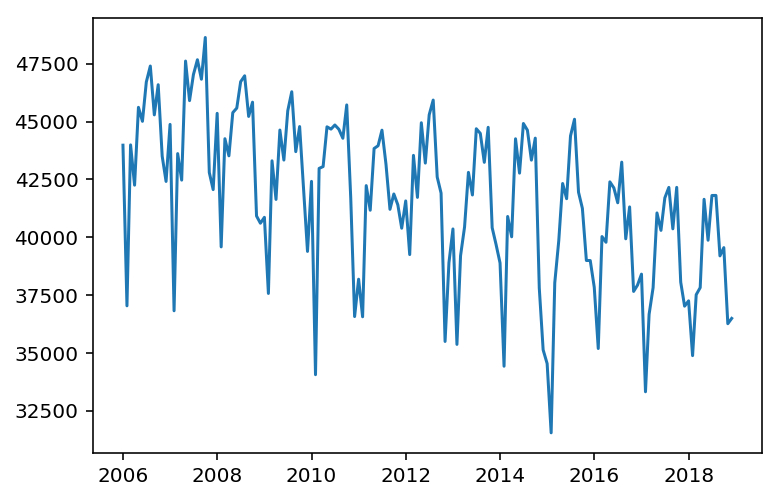

In [128]:
ny_month = nypd.groupby(["year","month"]).size()
ny_month = ny_month.reset_index()
ny_month.month = ny_month.month.astype(int)
ny_month.year = ny_month.year.astype(int)
ny_month.day = 1
ny_month["day"] = 1
ny_month["date"] = pd.to_datetime(ny_month[["year","month","day"]])
plt.plot( ny_month.date, ny_month[0] )

Text(0.5, 1.0, 'Baltimore PD')

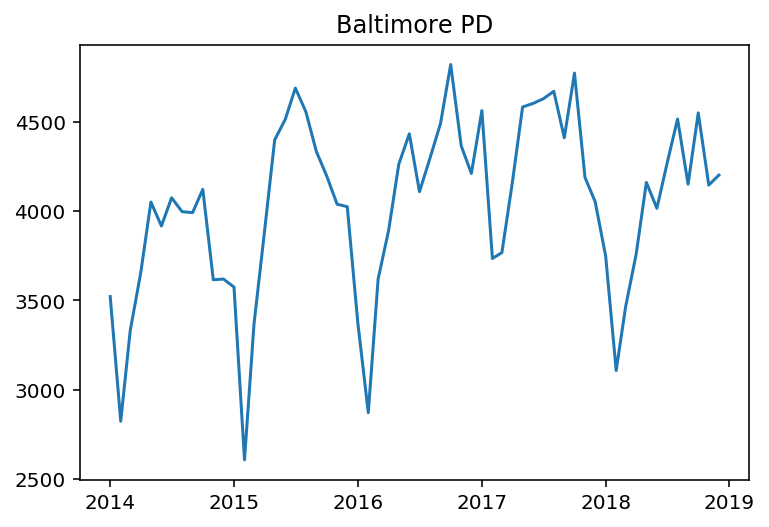

In [131]:
balt_month = balt_pd.groupby(["year","month"]).size()
balt_month = balt_month.reset_index()
balt_month.month = balt_month.month.astype(int)
balt_month.year = balt_month.year.astype(int)
balt_month.day = 1
balt_month["day"] = 1
balt_month["date"] = pd.to_datetime(balt_month[["year","month","day"]])
plt.plot( balt_month.date, balt_month[0] )
plt.title('Baltimore PD')

Text(0.5, 1.0, 'SFPD')

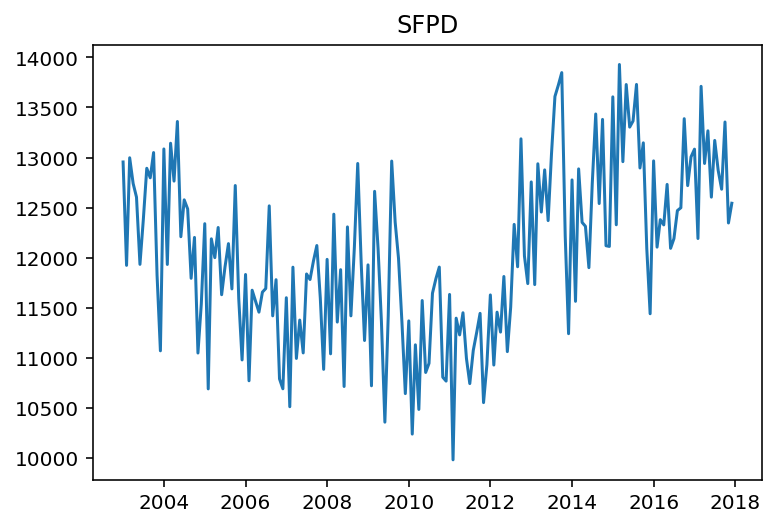

In [133]:
sf_month = sfpd.groupby(["year","month"]).size()
sf_month = sf_month.reset_index()
sf_month.month = sf_month.month.astype(int)
sf_month.year = sf_month.year.astype(int)
sf_month.day = 1
sf_month["day"] = 1
sf_month["date"] = pd.to_datetime(sf_month[["year","month","day"]])
plt.plot( sf_month.date, sf_month[0] )
plt.title('SFPD')

Text(0.5, 1.0, 'LAPD')

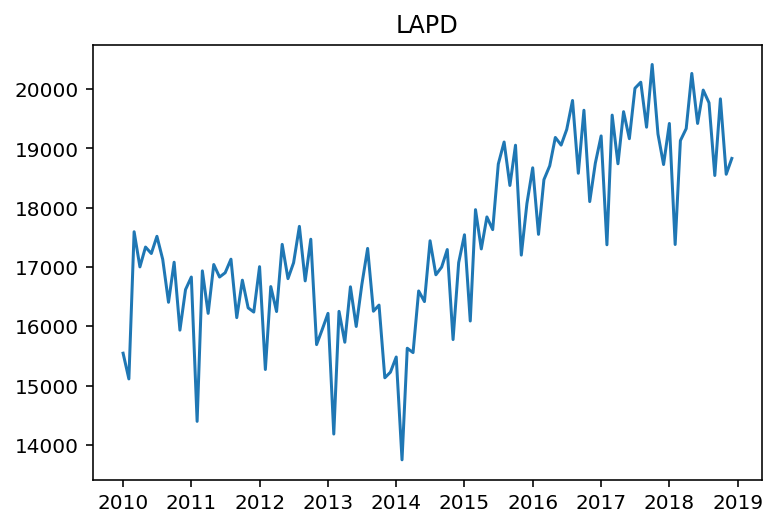

In [134]:
la_month = lapd.groupby(["year","month"]).size()
la_month = la_month.reset_index()
la_month.month = la_month.month.astype(int)
la_month.year = la_month.year.astype(int)
la_month.day = 1
la_month["day"] = 1
la_month["date"] = pd.to_datetime(la_month[["year","month","day"]])
plt.plot( la_month.date, la_month[0] )
plt.title('LAPD')

Text(0.5, 0, 'Year')

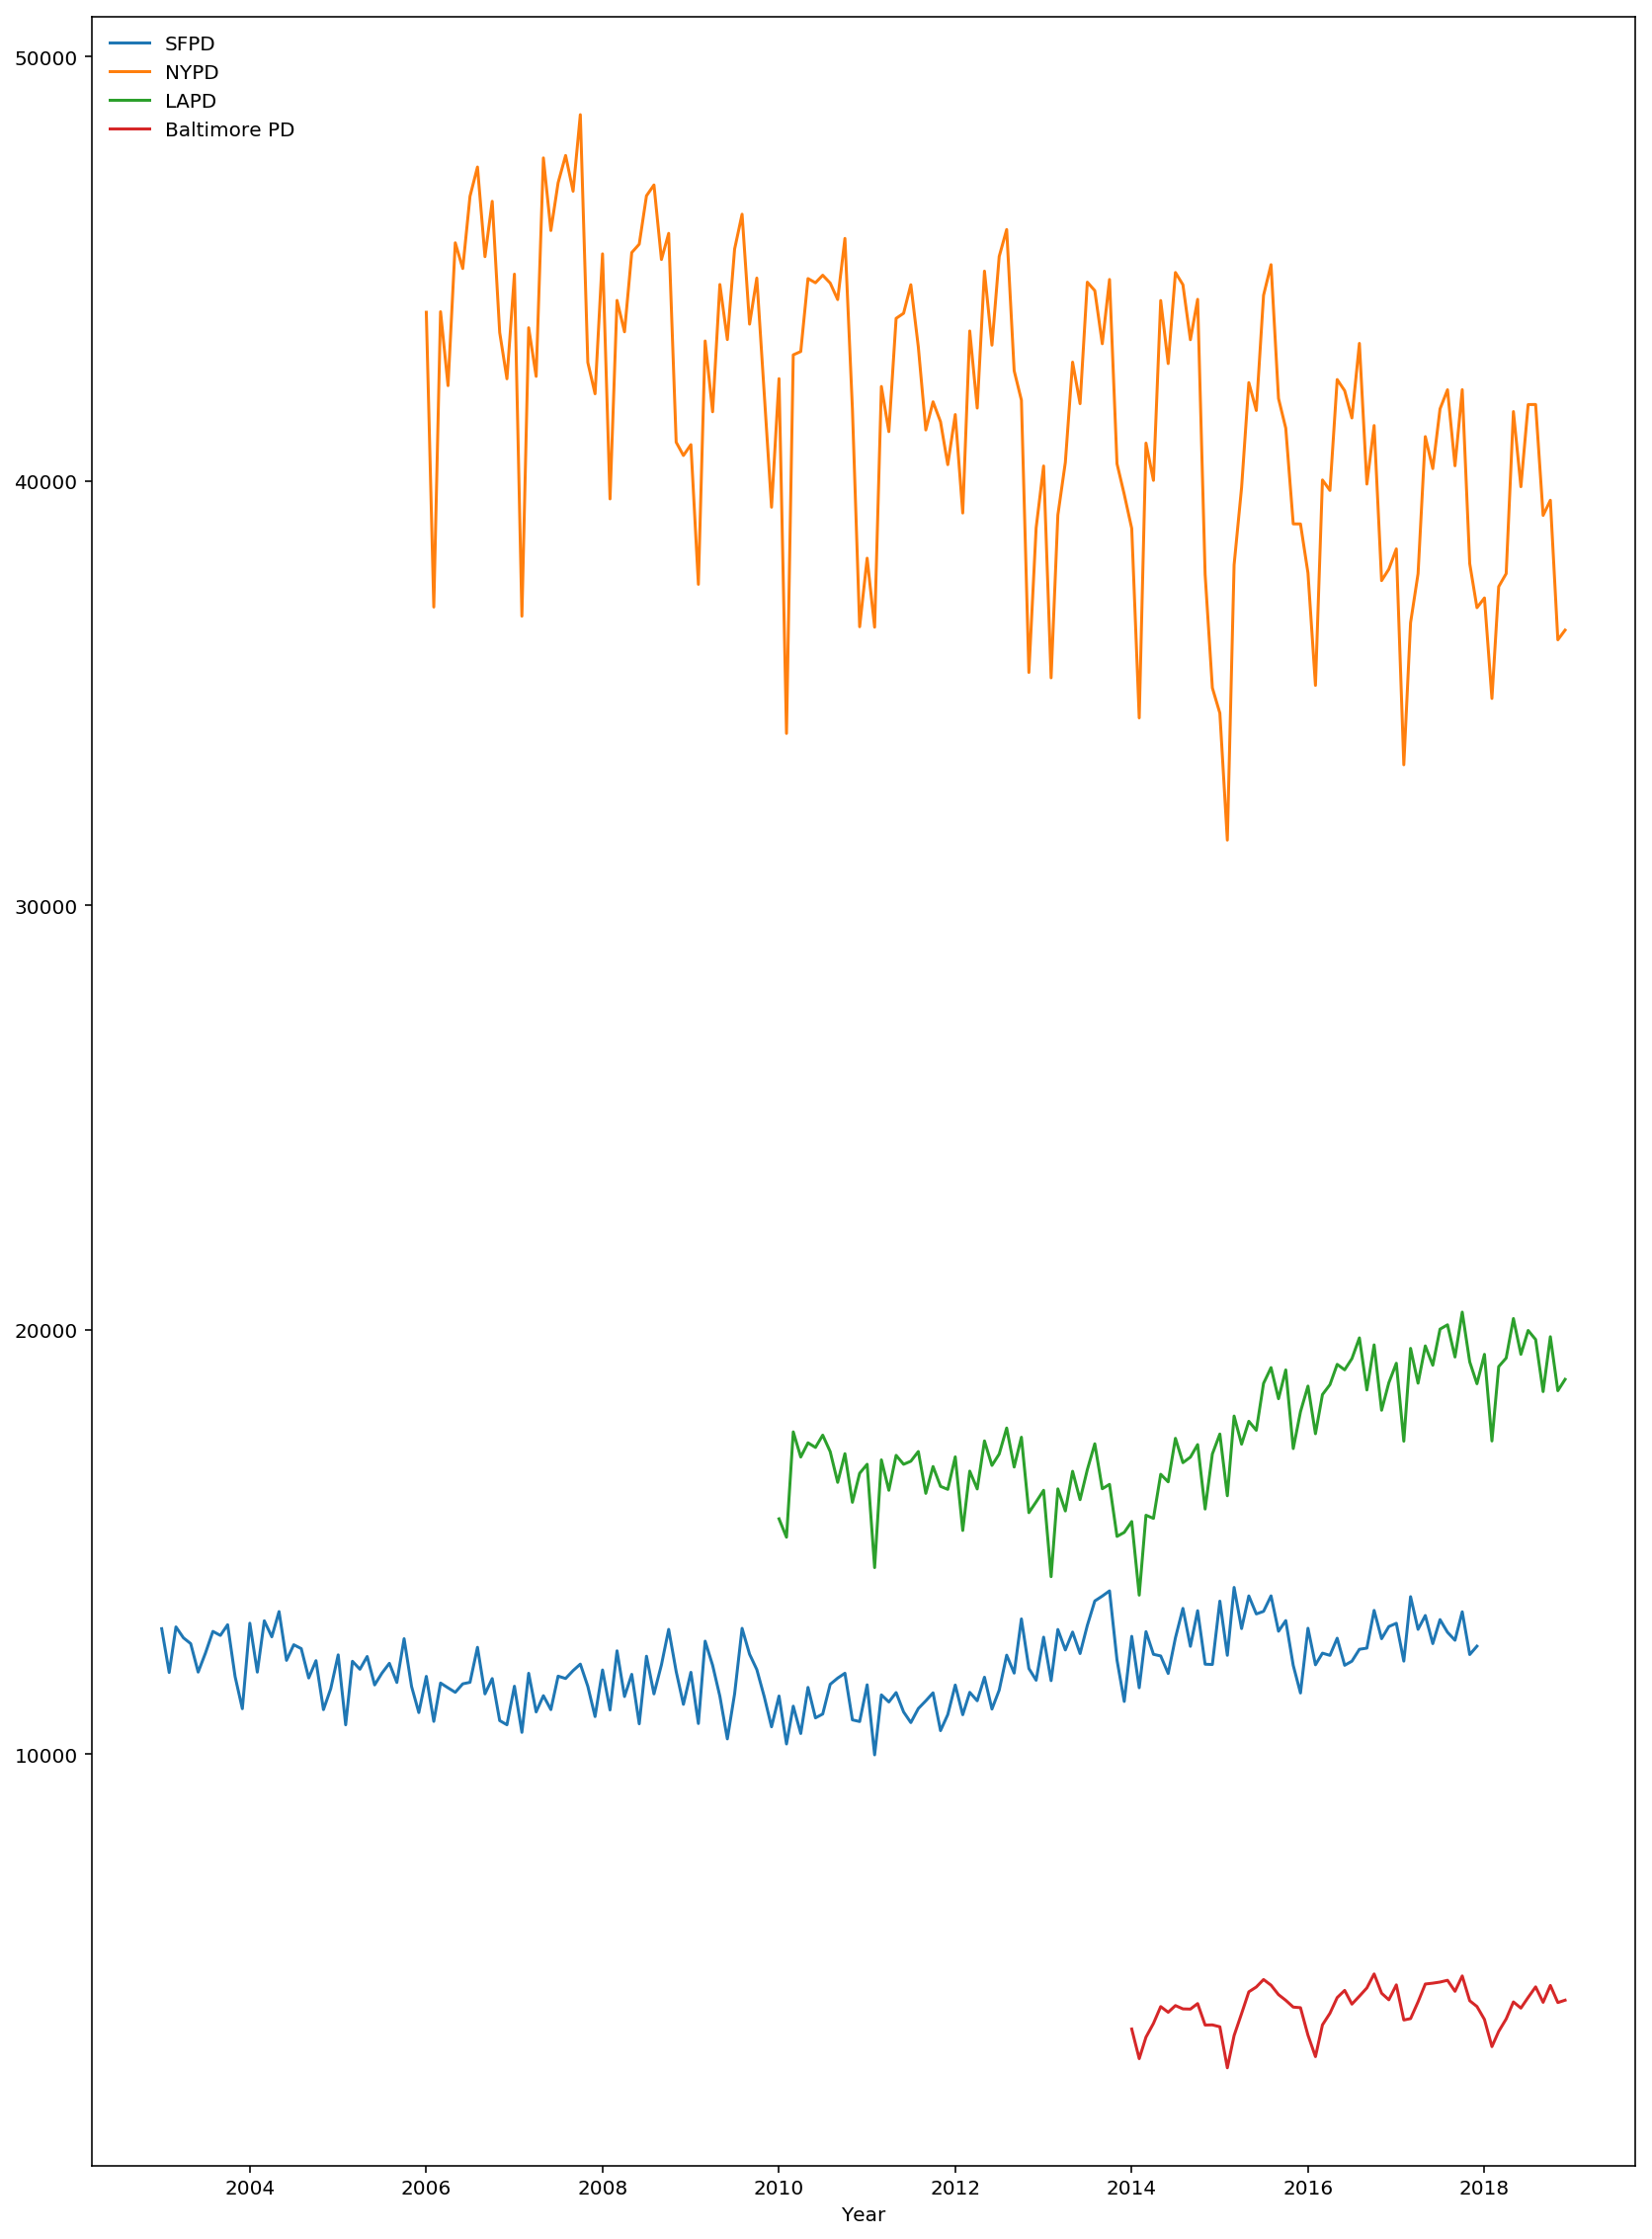

In [138]:
plt.figure(figsize = (14,20))
plt.plot( sf_month.date, sf_month[0], label='SFPD' )
plt.plot( ny_month.date, ny_month[0], label='NYPD')
plt.plot( la_month.date, la_month[0], label='LAPD')
plt.plot( balt_month.date, balt_month[0], label='Baltimore PD')
plt.legend(loc='upper left', frameon=False)
plt.xlabel('Year')

Text(0.5, 0, 'Year')

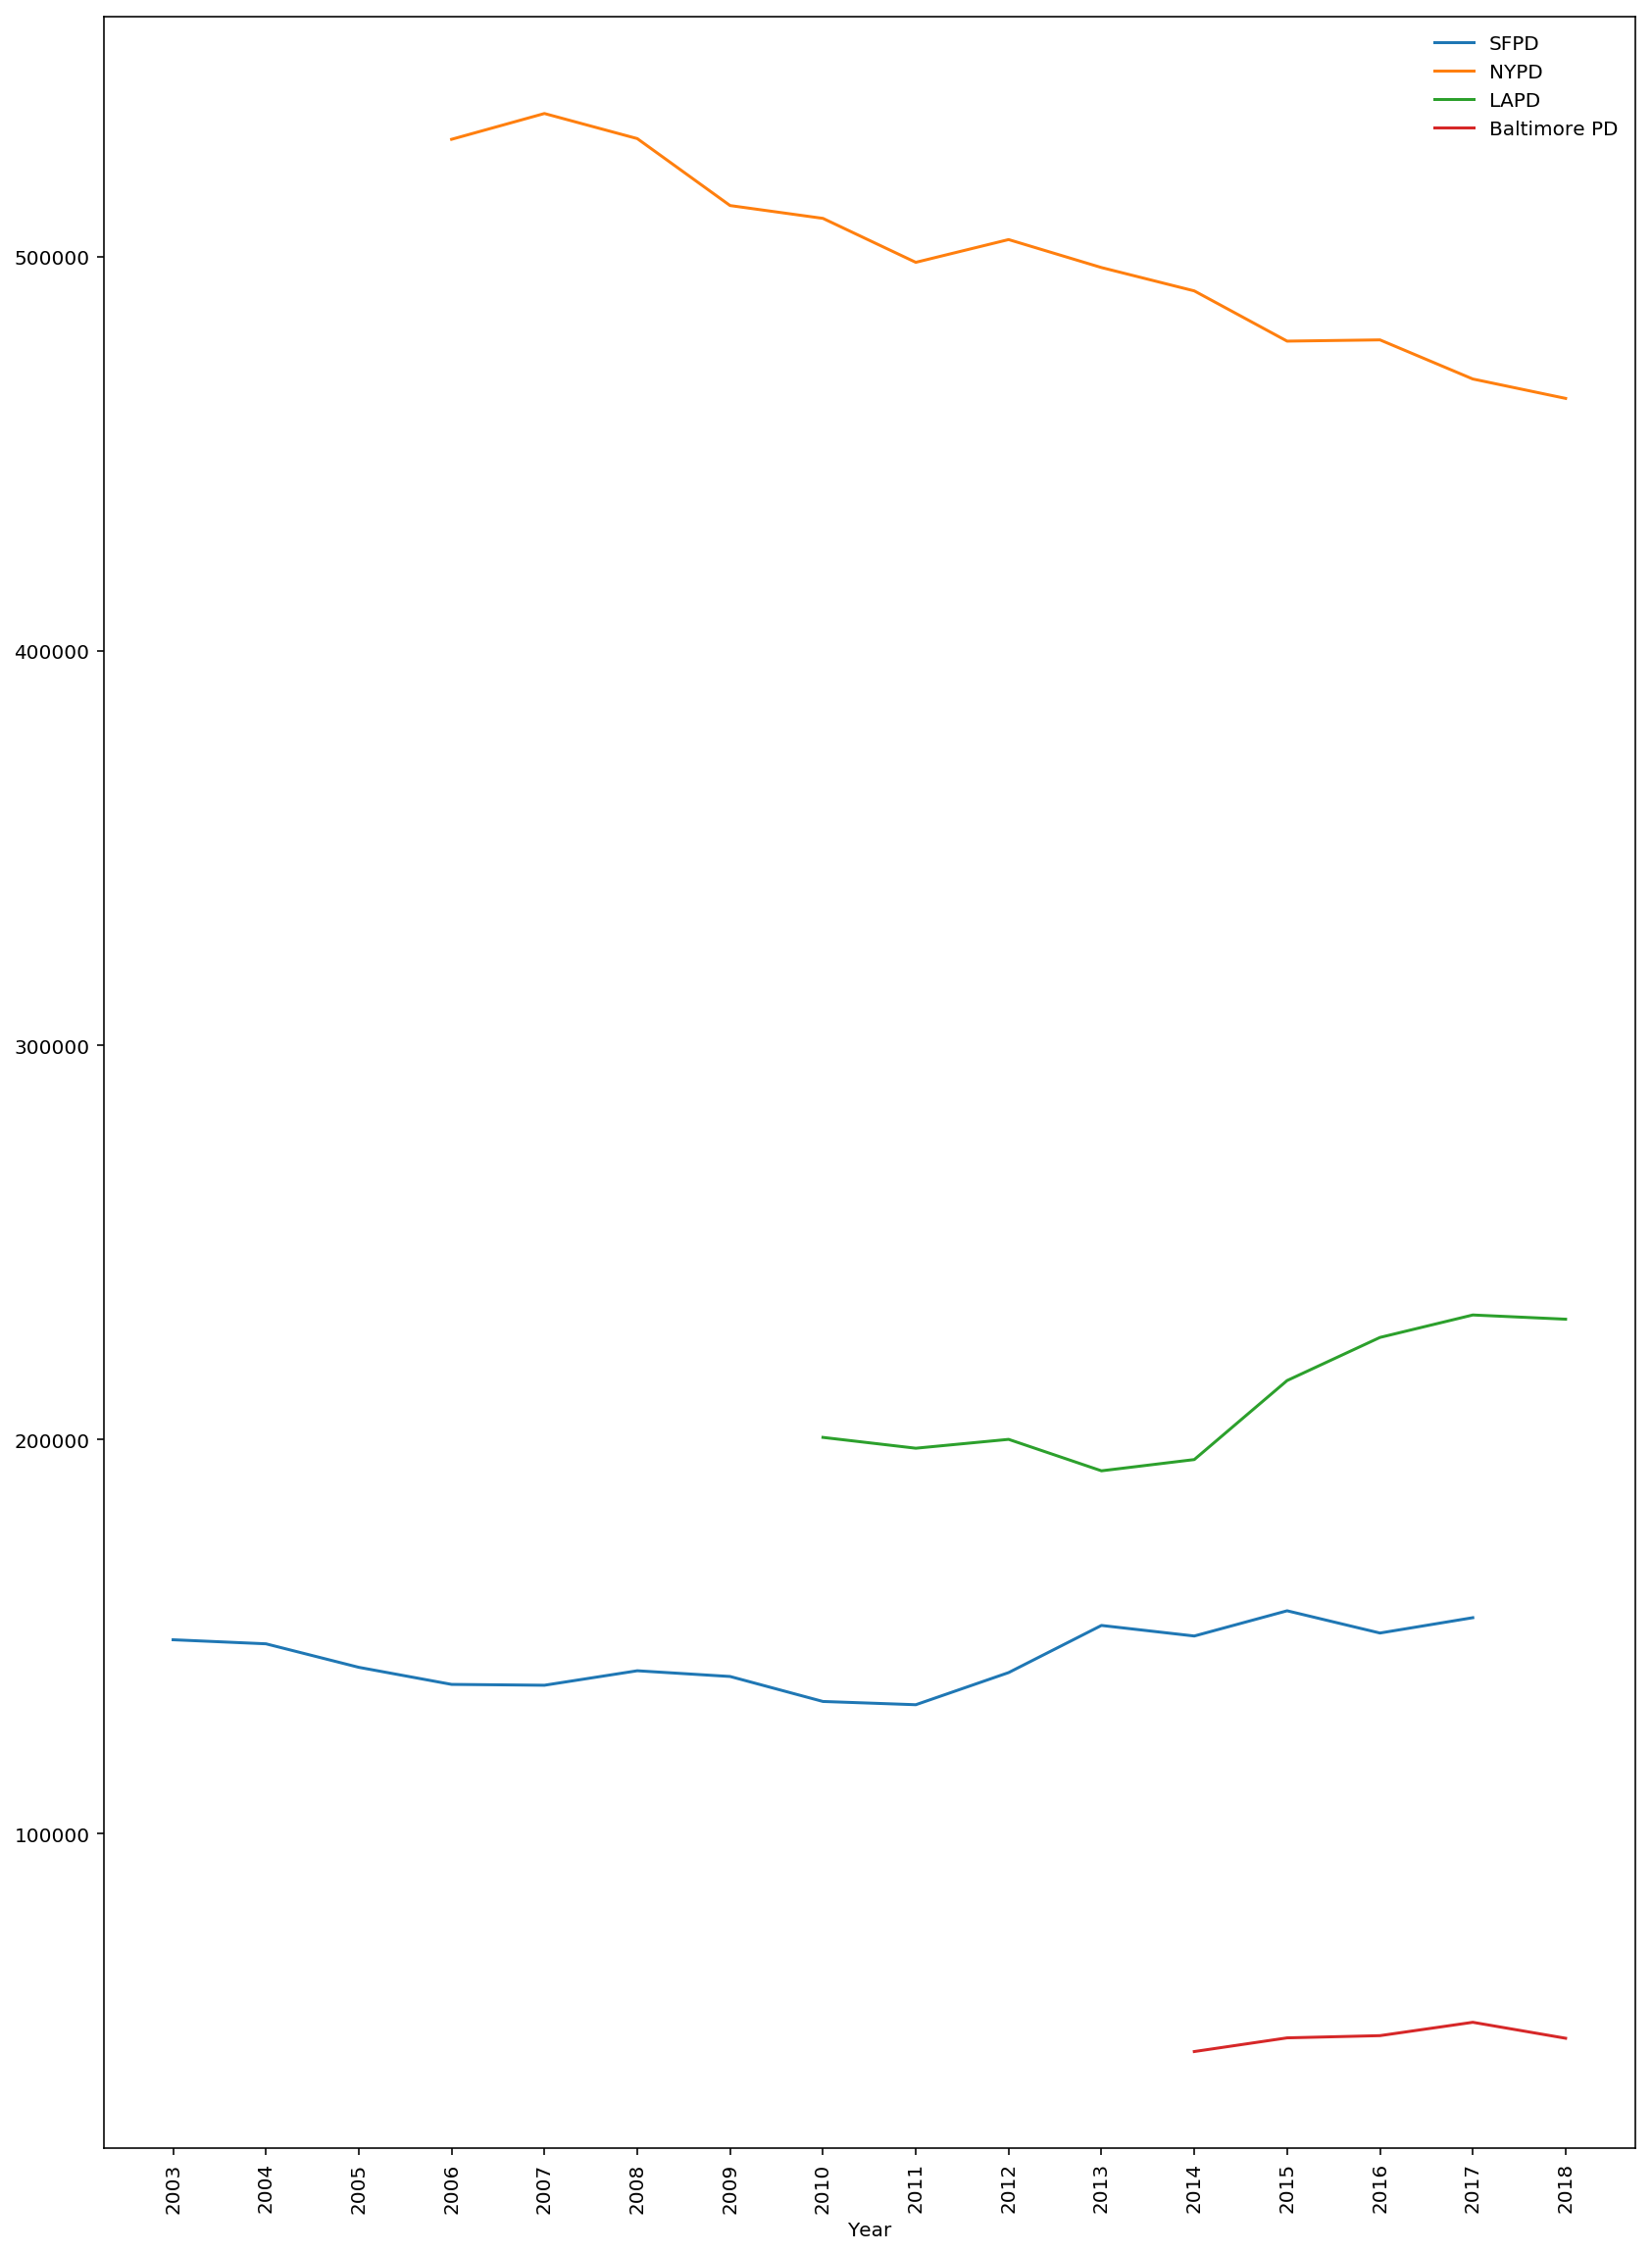

In [88]:
plt.figure(figsize = (14,20))
plt.plot(sfpd.groupby(['year']).size(), label = 'SFPD')
plt.plot(nypd.groupby(['year']).size(), label = 'NYPD')
plt.plot(lapd.groupby(['year']).size(), label = 'LAPD')
plt.plot(balt_pd.groupby(['year']).size(), label = 'Baltimore PD')
plt.legend(loc='upper right', frameon=False)

plt.xticks(rotation='vertical')
plt.xlabel('Year')

In [174]:
nypd['severe']=nypd['OFNS_DESC'].str.contains('assault|shooting|rape|sex crimes|kidnap|offenses related to children|manslaughter|battery|homocide|murder', flags=re.IGNORECASE, regex=True)
lapd['severe']=lapd['Crime Code Description'].str.contains('assault|shooting|rape|sex crimes|kidnap|offenses related to children|manslaughter|homocide|murder', flags=re.IGNORECASE, regex=True)
sfpd['severe']=sfpd['Descript'].str.contains('assault|shooting|rape|sex crimes|kidnap|offenses related to children|manslaughter|battery|force|homicide|murder', flags=re.IGNORECASE, regex=True)
balt_pd['severe']=balt_pd['Description'].str.contains('assault|shooting|rape|sex crimes|kidnap|offenses related to children|manslaughter|battery|force|homicide|murder', flags=re.IGNORECASE, regex=True)



In [230]:
nypd.head(3)

0    False
1     True
2    False
Name: severe, dtype: object

In [195]:
severe_balt=balt_pd.loc[balt_pd['severe']==True]
severe_sfpd=sfpd.loc[sfpd['severe']==True]
severe_lapd=lapd.loc[lapd['severe']==True]
severe_nypd=nypd.loc[nypd['severe']==True]

In [234]:
sfpd.groupby('severe').count().iloc[:,0]

severe
False    2014247
True      154109
Name: IncidntNum, dtype: int64

In [211]:
shorten_ny = nypd[['month', 'year', 'severe']].copy()

In [235]:
lesser_balt = balt_pd.loc[balt_pd['severe']!=True]

In [237]:
lesser_sf = sfpd.loc[sfpd['severe']!=True]
lesser_balt = balt_pd.loc[balt_pd['severe']!=True]
lesser_la = lapd.loc[lapd['severe']!=True]
lesser_ny = nypd.loc[nypd['severe']!=True]

Text(0.5, 1.0, 'NYPD')

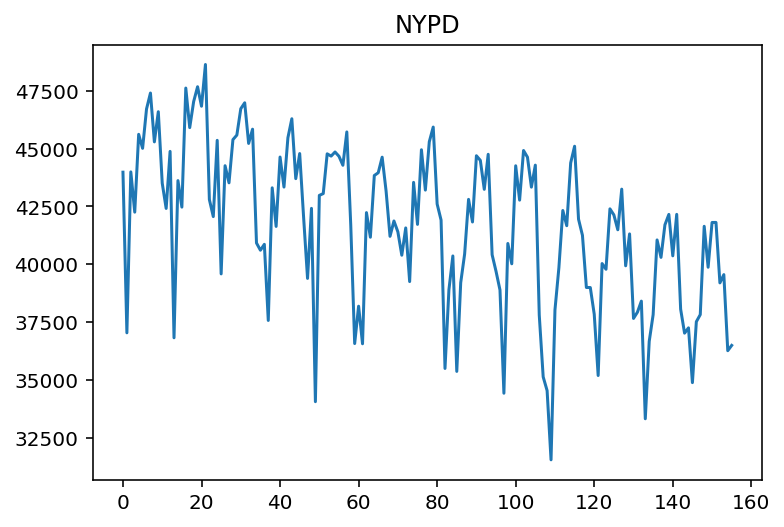

In [139]:
plt.plot(nypd.groupby(['year','month']).size().values)
plt.title('NYPD')

In [ ]:
max(balt_pd['year'])